# Particle Rank Prediction From Physical Properties

During this Project I will use features of discovered and theorized particles from the particle data group (PDG) to predict the rank of aforementioned particles. The Rank quantity is related to how certain the PDG is of the particles existence and experimental evidence and is categorised as such:

Rank - the particle rank as specified by the PDG, i.e., the number of baryon stars: <br>
Possible values are:<br>
4 - Existence is certain, and properties are at least fairly well explored.<br>
3 - Existence ranges from very likely to certain, but further confirmation<br>
is desirable and/or quantum numbers, branching fractions, etc. are not well determined.<br>
2 - Evidence of existence is only fair.<br>
1 - Evidence of existence is poor.<br>
0 - Fundamental Particles - Existence is certain.<br>

The features which will be used to predict this classification label will be: <br>
Mass - The invariant mass of the particle<br>
MassUpper - The upper bound of the mass of the particle<br>
MassLower - The lower bound of the mass of the particle<br>
Width - The decay width of the particle <br>
WidthUpper - The upper bound of the decay width<br>
WidthLower - The lower bound of the decay width<br>
G-parity - multiplicative quantum number that results from the generalization of C-parity to multiplets of particles<br>
Space Parity - Relates to the behaviour of the wavefunction under spatial reflection<br>
Charge Parity - Relates to the behaviour of the wavefunction under charge conjugation<br>
Charge - The charge of the particle measure in (1/3)*(charge of an electron)<br>
Name - Name of the particle<br>
Quarks - If applicable, the quark content of the particle<br> <br>

The aims of this project are to be able to make predictions on the likelihood/discoverability of hypotetical particles using machine learning estimators.

In [56]:
#Import the relevant packages
import pandas as pd
import particle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

In [63]:
#Particle Data from Rodrigues, E., & Schreiner, H. Particle [Computer software]. https://doi.org/10.5281/zenodo.2552429
particle = pd.read_csv("particle2023.csv") #Import csv
particle = particle.drop(["I","Status","Anti"],axis=1) #remove columns which contain info not related to project
particle.Quarks = particle.Quarks.astype("str") #Turn Quark content column into string type
particle #Inspect the Data

,ID,Mass,MassUpper,MassLower,Width,WidthUpper,WidthLower,G,P,C,Charge,Rank,Name,Quarks
0,1,4.67,0.5,0.2,-1.0,-1.0,-1.0,5,1,5,-1,0,d,d
1,-1,4.67,0.5,0.2,-1.0,-1.0,-1.0,5,1,5,1,0,d,D
2,2,2.16,0.5,0.3,-1.0,-1.0,-1.0,5,1,5,2,0,u,u
3,-2,2.16,0.5,0.3,-1.0,-1.0,-1.0,5,1,5,-2,0,u,U
4,3,93.40,8.6,3.4,-1.0,-1.0,-1.0,5,1,5,-1,0,s,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,9050221,1982.00,50.0,3.0,440.0,50.0,50.0,1,1,1,0,0,f(0)(2020),x(uU+dD)+y(sS)
618,9050225,1936.00,12.0,12.0,464.0,24.0,24.0,1,1,1,0,0,f(2)(1950),x(uU+dD)+y(sS)
619,9060225,2010.00,60.0,80.0,200.0,60.0,60.0,1,1,1,0,0,f(2)(2010),x(uU+dD)+y(sS)
620,9080225,2297.00,28.0,28.0,150.0,40.0,40.0,1,1,1,0,0,f(2)(2300),x(uU+dD)+y(sS)


In [64]:
print("""Rank - the particle rank as specified by the PDG, i.e., the number of baryon stars: Possible values are:
\ 4 - Existence is certain, and properties are at least fairly well explored.
\ 3 - Existence ranges from very likely to certain, but further confirmation
is desirable and/or quantum numbers, branching fractions, etc. are not well determined.
\ 2 - Evidence of existence is only fair.
\ 1 - Evidence of existence is poor.
\ 0 - Fundamental Particles - Existence is certain.""")

Rank - the particle rank as specified by the PDG, i.e., the number of baryon stars: Possible values are:
\ 4 - Existence is certain, and properties are at least fairly well explored.
\ 3 - Existence ranges from very likely to certain, but further confirmation
is desirable and/or quantum numbers, branching fractions, etc. are not well determined.
\ 2 - Evidence of existence is only fair.
\ 1 - Evidence of existence is poor.
\ 0 - Fundamental Particles - Existence is certain.


In [65]:
#lowercase quarks are the corresponding quarks, uppercase quarks are the corresponding anti-quarks. Apply lambda to OHE counts of each quark type.
particle["up_count"] = particle.Quarks.apply(lambda x: x.count("u"))
particle["anti_up_count"] = particle.Quarks.apply(lambda x: x.count("U"))
particle["down_count"] = particle.Quarks.apply(lambda x: x.count("d"))
particle["anti_down_count"] = particle.Quarks.apply(lambda x: x.count("D"))
particle["strange_count"] = particle.Quarks.apply(lambda x: x.count("s") if "sqrt" not in x else 0)
particle["anti_strange_count"] = particle.Quarks.apply(lambda x: x.count("S"))
particle["bottom_count"] = particle.Quarks.apply(lambda x: x.count("b"))
particle["anti_bottom_count"] = particle.Quarks.apply(lambda x: x.count("B"))
particle["top_count"] = particle.Quarks.apply(lambda x: x.count("t") if "sqrt" not in x else 0)
particle["anti_top_count"] = particle.Quarks.apply(lambda x: x.count("T"))
particle #Inspect the Data again

,ID,Mass,MassUpper,MassLower,Width,WidthUpper,WidthLower,G,P,C,...,up_count,anti_up_count,down_count,anti_down_count,strange_count,anti_strange_count,bottom_count,anti_bottom_count,top_count,anti_top_count
0,1,4.67,0.5,0.2,-1.0,-1.0,-1.0,5,1,5,...,0,0,1,0,0,0,0,0,0,0
1,-1,4.67,0.5,0.2,-1.0,-1.0,-1.0,5,1,5,...,0,0,0,1,0,0,0,0,0,0
2,2,2.16,0.5,0.3,-1.0,-1.0,-1.0,5,1,5,...,1,0,0,0,0,0,0,0,0,0
3,-2,2.16,0.5,0.3,-1.0,-1.0,-1.0,5,1,5,...,0,1,0,0,0,0,0,0,0,0
4,3,93.40,8.6,3.4,-1.0,-1.0,-1.0,5,1,5,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,9050221,1982.00,50.0,3.0,440.0,50.0,50.0,1,1,1,...,1,1,1,1,1,1,0,0,0,0
618,9050225,1936.00,12.0,12.0,464.0,24.0,24.0,1,1,1,...,1,1,1,1,1,1,0,0,0,0
619,9060225,2010.00,60.0,80.0,200.0,60.0,60.0,1,1,1,...,1,1,1,1,1,1,0,0,0,0
620,9080225,2297.00,28.0,28.0,150.0,40.0,40.0,1,1,1,...,1,1,1,1,1,1,0,0,0,0


In [66]:
particle.info() #Inspect Datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  622 non-null    int64  
 1   Mass                622 non-null    float64
 2   MassUpper           622 non-null    float64
 3   MassLower           622 non-null    float64
 4   Width               622 non-null    float64
 5   WidthUpper          622 non-null    float64
 6   WidthLower          622 non-null    float64
 7   G                   622 non-null    int64  
 8   P                   622 non-null    int64  
 9   C                   622 non-null    int64  
 10  Charge              622 non-null    int64  
 11  Rank                622 non-null    int64  
 12  Name                622 non-null    object 
 13  Quarks              622 non-null    object 
 14  up_count            622 non-null    int64  
 15  anti_up_count       622 non-null    int64  
 16  down_cou

<AxesSubplot:>

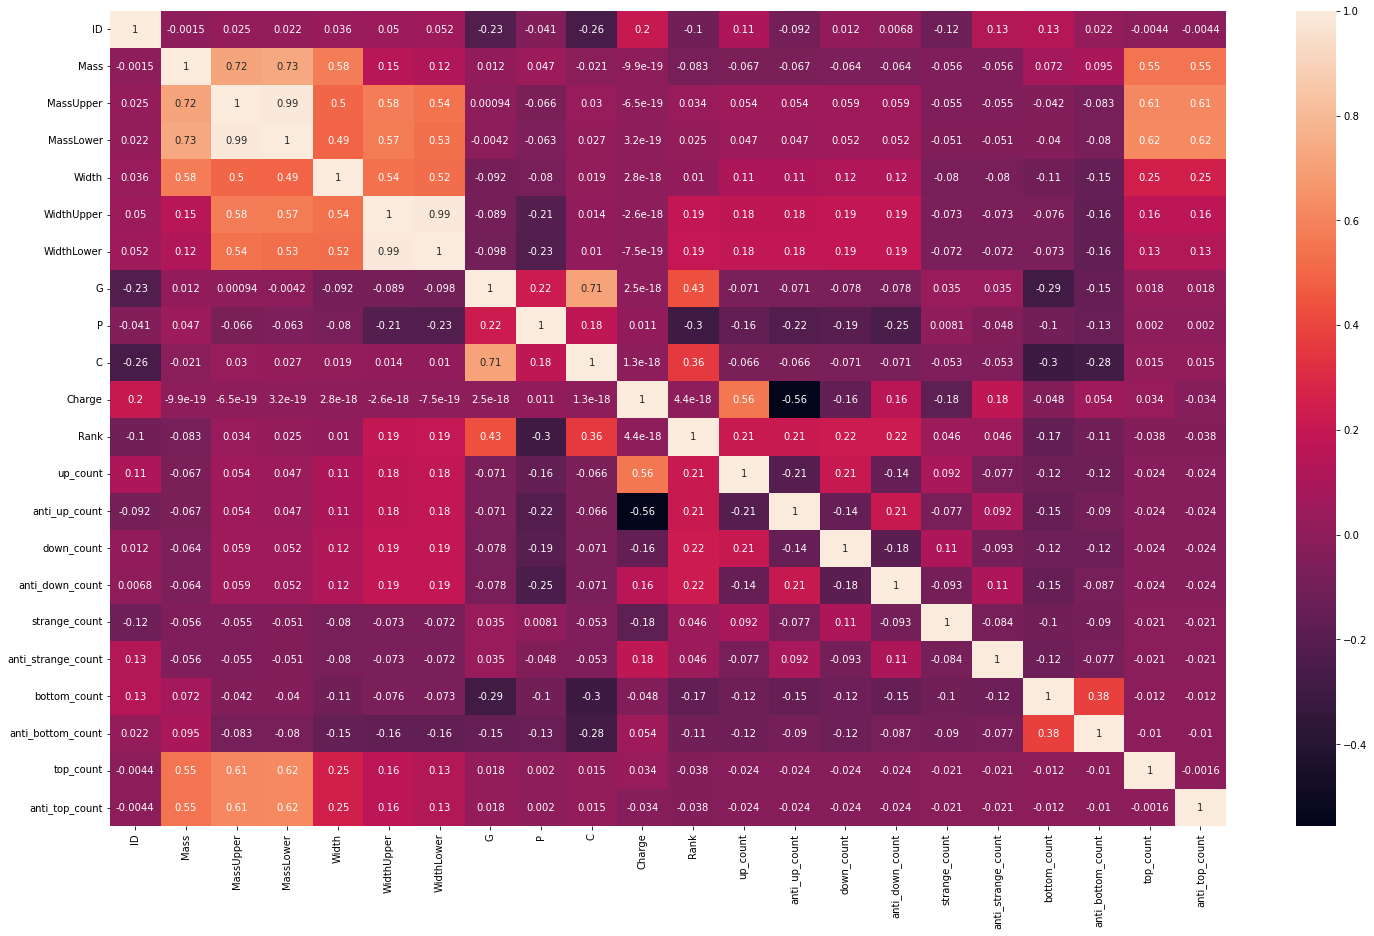

In [67]:
plt.figure(figsize = (25,15))
sns.heatmap(particle.corr(),annot = True) #EDA to see which items are correlated.

In [68]:
sc = StandardScaler() #StandardScaler to transform scale of particular variables
particle["Mass"] =sc.fit_transform(particle["Mass"].values.reshape(-1,1))
particle["MassUpper"] = sc.fit_transform(particle["MassUpper"].values.reshape(-1,1))
particle["MassLower"] = sc.fit_transform(particle["MassLower"].values.reshape(-1,1))
particle["Width"] = sc.fit_transform(particle["Width"].values.reshape(-1,1))
particle["WidthUpper"] = sc.fit_transform(particle["WidthUpper"].values.reshape(-1,1))
particle["WidthLower"] = sc.fit_transform(particle["WidthLower"].values.reshape(-1,1))
particle["G"] = sc.fit_transform(particle["G"].values.reshape(-1,1))
particle["P"] = sc.fit_transform(particle["P"].values.reshape(-1,1))
particle["C"] = sc.fit_transform(particle["C"].values.reshape(-1,1))
particle #Inspect data

,ID,Mass,MassUpper,MassLower,Width,WidthUpper,WidthLower,G,P,C,...,up_count,anti_up_count,down_count,anti_down_count,strange_count,anti_strange_count,bottom_count,anti_bottom_count,top_count,anti_top_count
0,1,-0.256196,-0.352451,-0.341989,-0.634707,-0.679166,-0.682419,0.460463,0.049896,0.378004,...,0,0,1,0,0,0,0,0,0,0
1,-1,-0.256196,-0.352451,-0.341989,-0.634707,-0.679166,-0.682419,0.460463,0.049896,0.378004,...,0,0,0,1,0,0,0,0,0,0
2,2,-0.256399,-0.352451,-0.339738,-0.634707,-0.679166,-0.682419,0.460463,0.049896,0.378004,...,1,0,0,0,0,0,0,0,0,0
3,-2,-0.256399,-0.352451,-0.339738,-0.634707,-0.679166,-0.682419,0.460463,0.049896,0.378004,...,0,1,0,0,0,0,0,0,0,0
4,3,-0.249014,-0.171713,-0.269962,-0.634707,-0.679166,-0.682419,0.460463,0.049896,0.378004,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,9050221,-0.096151,0.752060,-0.278965,1.496627,0.586523,0.626991,-1.535412,0.049896,-2.058455,...,1,1,1,1,1,1,0,0,0,0
618,9050225,-0.099875,-0.095848,-0.076389,1.612618,-0.058730,-0.040551,-1.535412,0.049896,-2.058455,...,1,1,1,1,1,1,0,0,0,0
619,9060225,-0.093885,0.975193,1.454189,0.336717,0.834698,0.883738,-1.535412,0.049896,-2.058455,...,1,1,1,1,1,1,0,0,0,0
620,9080225,-0.070655,0.261166,0.283747,0.095069,0.338349,0.370244,-1.535412,0.049896,-2.058455,...,1,1,1,1,1,1,0,0,0,0


In [75]:
#Defining features and labels
X= particle[['Mass', 'MassUpper', 'MassLower', 'Width', 'WidthUpper',
       'WidthLower', 'G', 'P', 'C', 'Charge',
       'up_count', 'anti_up_count', 'down_count', 'anti_down_count',
       'strange_count', 'anti_strange_count', 'bottom_count',
       'anti_bottom_count', 'top_count', 'anti_top_count']]
y=particle["Rank"]


In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25) #Train test split

In [77]:
clf = LinearSVC(max_iter=10000,dual=True) #Fit classifier estimator to data and inspect score

clf.fit(X_train,y_train)
clf.score(X_test,y_test)


0.7948717948717948

In [78]:
clf2=KNeighborsClassifier(n_neighbors=1) #KNNeighbours classifier and inspect score

clf2.fit(X_train,y_train)
clf2.score(np.array(X_test),np.array(y_test))

C:\Users\seb_d\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8589743589743589

In [79]:
clf3=SVC() #SVC classifier and inspect score

clf3.fit(X_train,y_train)

clf3.score(X_test,y_test)

0.717948717948718

In [80]:
#Using stacking ensemble method to combine the three above estimators and inspect score.
estimators = [
     ('LSVC', clf),
     ('KNN', clf2 )]
clfstack = StackingClassifier(estimators=estimators, final_estimator=clf3)

clfstack.fit(np.array(X_train), np.array(y_train))
clfstack.score(np.array(X_test), np.array(y_test))


0.8717948717948718

It can be seen from the results of the above test that the ensemble stacking model scores approximately 85%-90% on testing data which is quite high. Next steps for this project would entail obtaining physical properties of hypothetical particles and utilising the rank label to predict whether they would be easily/ not very easy to experimentally verify as prior "similar" particles have been.